### 模拟登录微信公众平台
- 获取md5加密方式
- 逆向模拟md5加密过程
- 模拟登录

#### 1. 打开开发者调试工具，输入密码进行抓包  
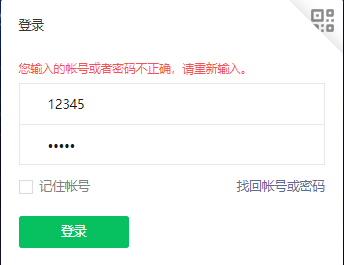
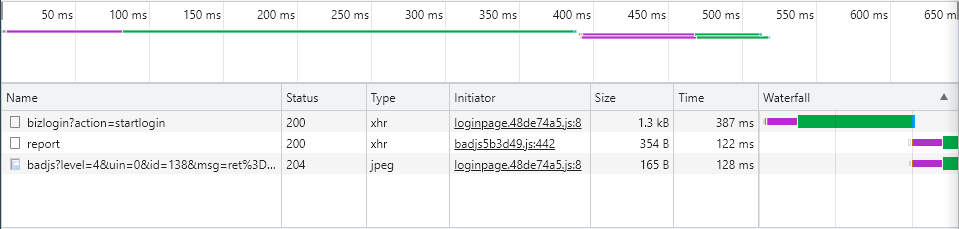

#### 2. 找到发送账号密码的包，对加密字段进行全局搜索（Ctrl+Shift+F）  
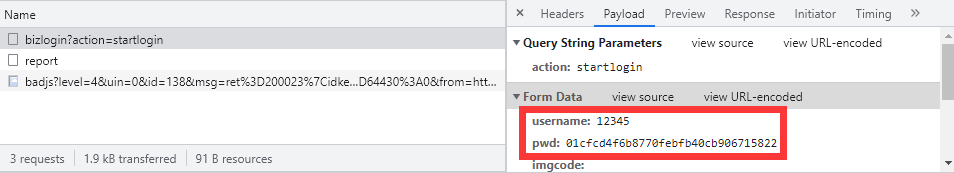
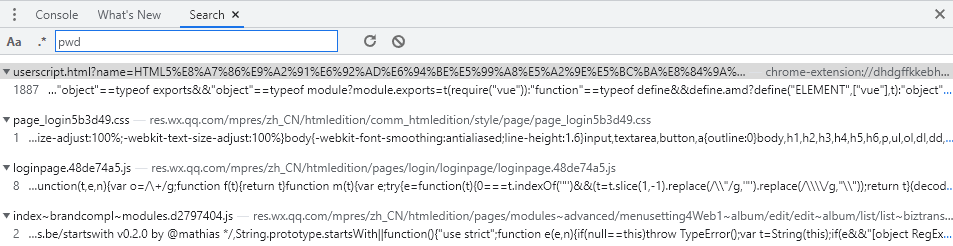
>由此可见密码被加密发送

#### 3. 找寻可能加密的js文件，找到可能被加密的字段打上断点  
>（一般可疑的地方都可以打上断点，之后调试找到被加密的地方，所以有完整字段的地方可以打上断点，这里的加密字段是pwd）  

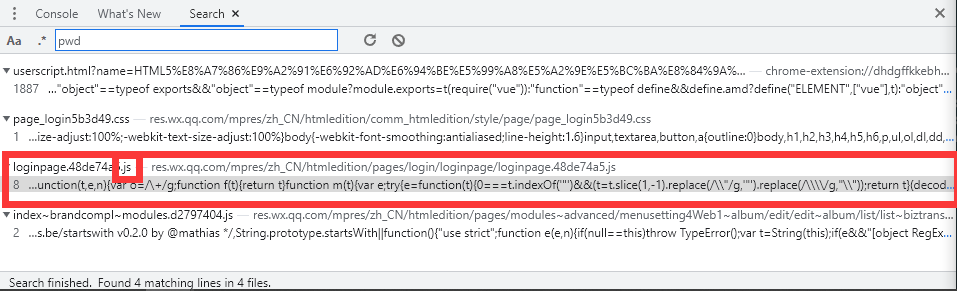
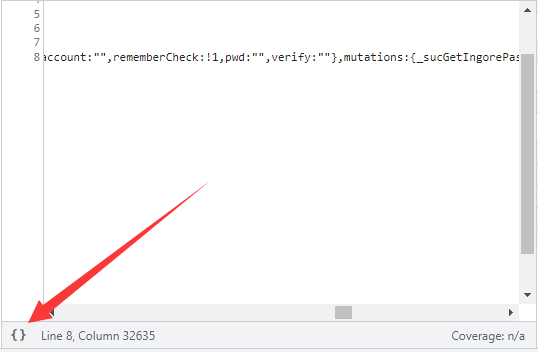
>点击格式化方便查看js代码

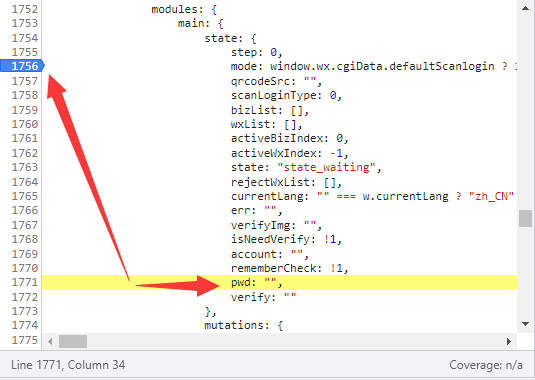
>在pwd字段行号打上断点，但因为在语句中打不上，可以打在上面，因为程序从上面语句经过

>然后在js文本中搜索字段pwd（Ctrl+F）

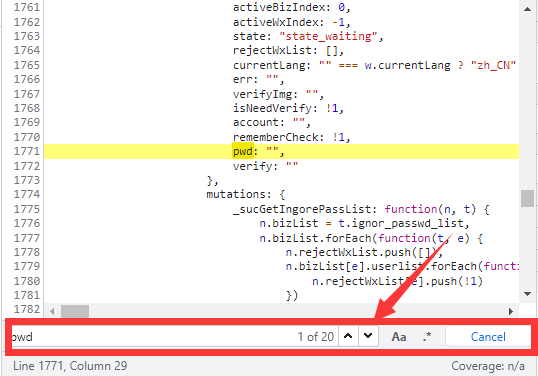
>然后查看每一个字段的代码，在可能加密的地方打上断点（点击行号添加断点，我一共打了五处可疑的断点）

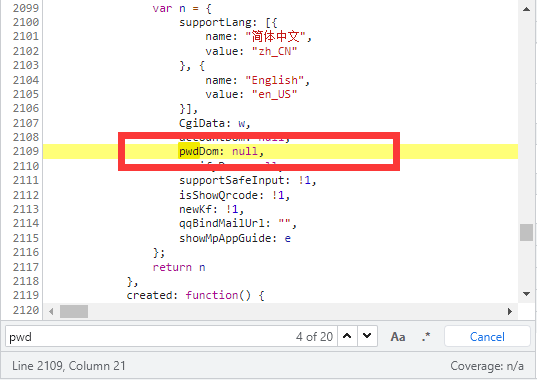
>如若字段不匹配（应为pwd，这里为pwdDom）则不是我们所找的字段，无需打断点

#### 4.找到可能是加密的js代码
> 重新登录一次，代码则在断点处断下

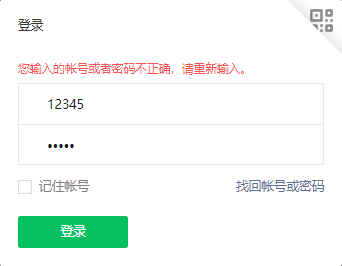
> 代码在此处停下，js代码是把e的值赋予pwd，但鼠标指向e会跳出来e的值，发现并执行加密操作，则可以取消断点，然后接着运行

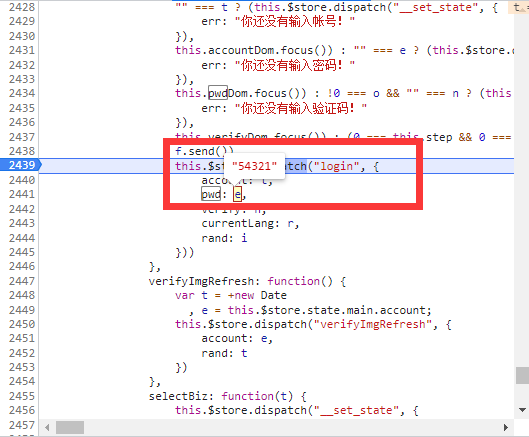
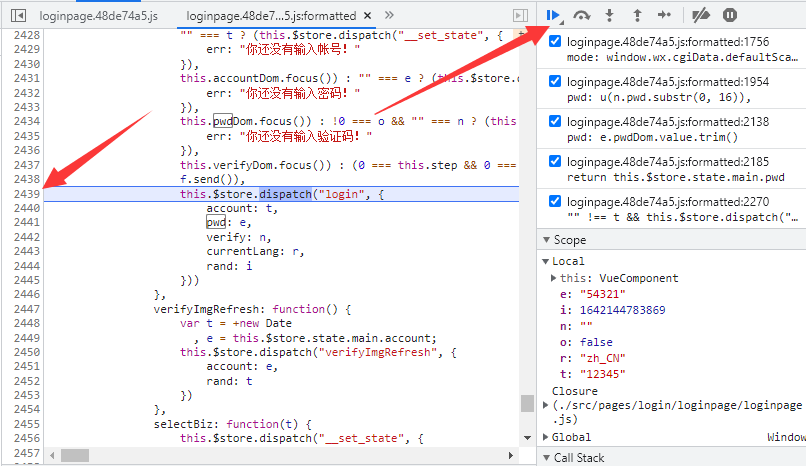

>当代码执行到此处，执行了函数操作，将鼠标指向u，跳出函数所在位置，点击蓝色的链接跟踪

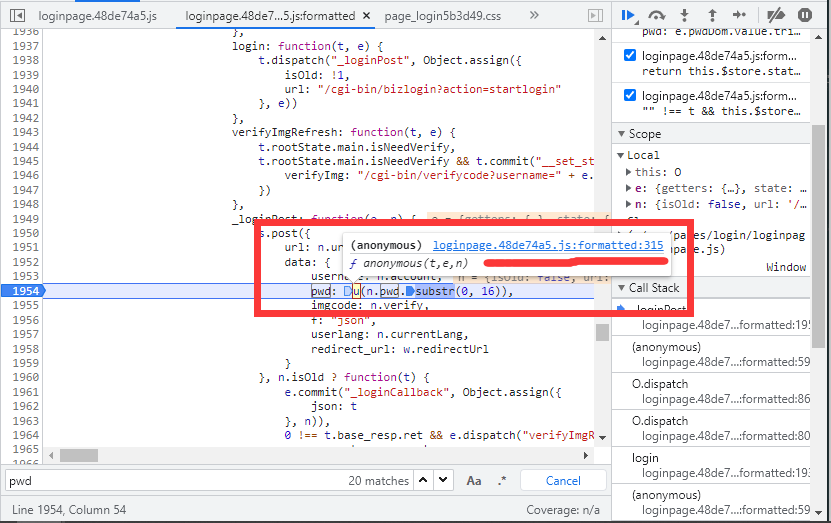
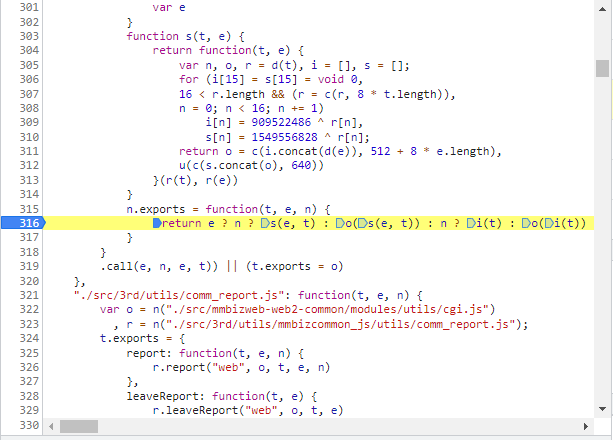
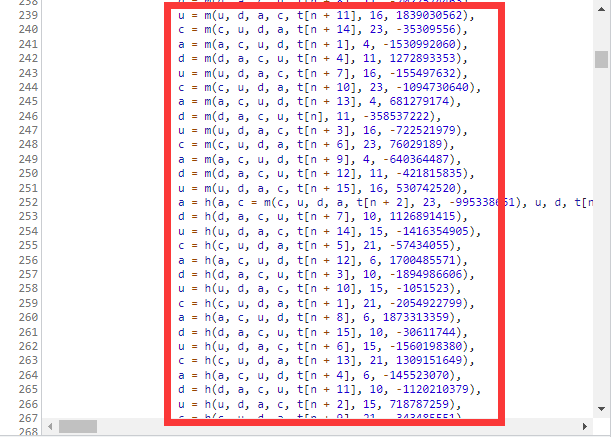
>跟踪到此处时，我们先下个断点，往上查看代码，发现可疑的加密操作

>将整个代码块复制下来（技巧：当光标在大括号旁会出现下划线，于此会匹配对应的大括号也会出现下划线，将括号中间的代码复制）

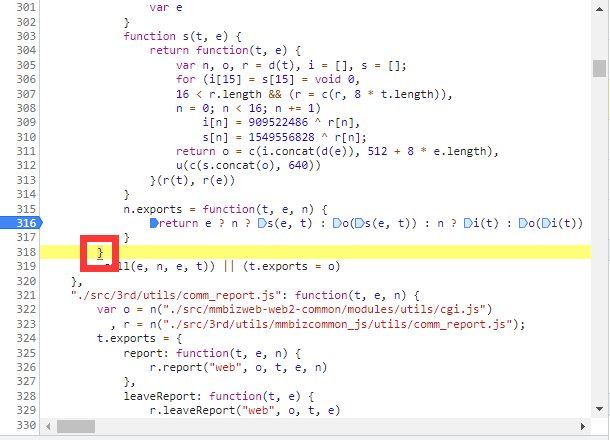
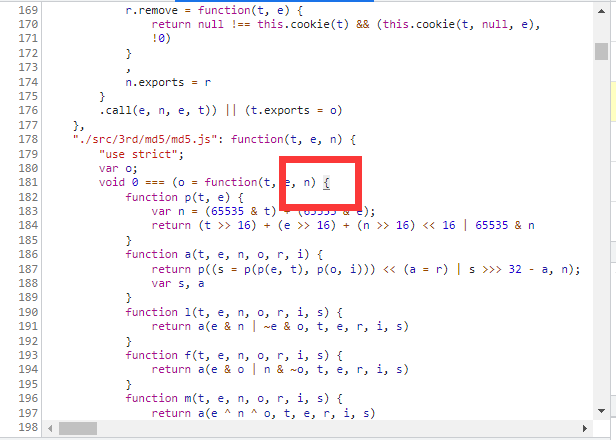

```
            function p(t, e) {
                var n = (65535 & t) + (65535 & e);
                return (t >> 16) + (e >> 16) + (n >> 16) << 16 | 65535 & n
            }
            function a(t, e, n, o, r, i) {
                return p((s = p(p(e, t), p(o, i))) << (a = r) | s >>> 32 - a, n);
                var s, a
            }
            function l(t, e, n, o, r, i, s) {
                return a(e & n | ~e & o, t, e, r, i, s)
            }
            function f(t, e, n, o, r, i, s) {
                return a(e & o | n & ~o, t, e, r, i, s)
            }
            function m(t, e, n, o, r, i, s) {
                return a(e ^ n ^ o, t, e, r, i, s)
            }
            function h(t, e, n, o, r, i, s) {
                return a(n ^ (e | ~o), t, e, r, i, s)
            }
            function c(t, e) {
                t[e >> 5] |= 128 << e % 32,
                t[14 + (e + 64 >>> 9 << 4)] = e;
                var n, o, r, i, s, a = 1732584193, c = -271733879, u = -1732584194, d = 271733878;
                for (n = 0; n < t.length; n += 16)
                    a = l(o = a, r = c, i = u, s = d, t[n], 7, -680876936),
                    d = l(d, a, c, u, t[n + 1], 12, -389564586),
                    u = l(u, d, a, c, t[n + 2], 17, 606105819),
                    c = l(c, u, d, a, t[n + 3], 22, -1044525330),
                    a = l(a, c, u, d, t[n + 4], 7, -176418897),
                    d = l(d, a, c, u, t[n + 5], 12, 1200080426),
                    u = l(u, d, a, c, t[n + 6], 17, -1473231341),
                    c = l(c, u, d, a, t[n + 7], 22, -45705983),
                    a = l(a, c, u, d, t[n + 8], 7, 1770035416),
                    d = l(d, a, c, u, t[n + 9], 12, -1958414417),
                    u = l(u, d, a, c, t[n + 10], 17, -42063),
                    c = l(c, u, d, a, t[n + 11], 22, -1990404162),
                    a = l(a, c, u, d, t[n + 12], 7, 1804603682),
                    d = l(d, a, c, u, t[n + 13], 12, -40341101),
                    u = l(u, d, a, c, t[n + 14], 17, -1502002290),
                    a = f(a, c = l(c, u, d, a, t[n + 15], 22, 1236535329), u, d, t[n + 1], 5, -165796510),
                    d = f(d, a, c, u, t[n + 6], 9, -1069501632),
                    u = f(u, d, a, c, t[n + 11], 14, 643717713),
                    c = f(c, u, d, a, t[n], 20, -373897302),
                    a = f(a, c, u, d, t[n + 5], 5, -701558691),
                    d = f(d, a, c, u, t[n + 10], 9, 38016083),
                    u = f(u, d, a, c, t[n + 15], 14, -660478335),
                    c = f(c, u, d, a, t[n + 4], 20, -405537848),
                    a = f(a, c, u, d, t[n + 9], 5, 568446438),
                    d = f(d, a, c, u, t[n + 14], 9, -1019803690),
                    u = f(u, d, a, c, t[n + 3], 14, -187363961),
                    c = f(c, u, d, a, t[n + 8], 20, 1163531501),
                    a = f(a, c, u, d, t[n + 13], 5, -1444681467),
                    d = f(d, a, c, u, t[n + 2], 9, -51403784),
                    u = f(u, d, a, c, t[n + 7], 14, 1735328473),
                    a = m(a, c = f(c, u, d, a, t[n + 12], 20, -1926607734), u, d, t[n + 5], 4, -378558),
                    d = m(d, a, c, u, t[n + 8], 11, -2022574463),
                    u = m(u, d, a, c, t[n + 11], 16, 1839030562),
                    c = m(c, u, d, a, t[n + 14], 23, -35309556),
                    a = m(a, c, u, d, t[n + 1], 4, -1530992060),
                    d = m(d, a, c, u, t[n + 4], 11, 1272893353),
                    u = m(u, d, a, c, t[n + 7], 16, -155497632),
                    c = m(c, u, d, a, t[n + 10], 23, -1094730640),
                    a = m(a, c, u, d, t[n + 13], 4, 681279174),
                    d = m(d, a, c, u, t[n], 11, -358537222),
                    u = m(u, d, a, c, t[n + 3], 16, -722521979),
                    c = m(c, u, d, a, t[n + 6], 23, 76029189),
                    a = m(a, c, u, d, t[n + 9], 4, -640364487),
                    d = m(d, a, c, u, t[n + 12], 11, -421815835),
                    u = m(u, d, a, c, t[n + 15], 16, 530742520),
                    a = h(a, c = m(c, u, d, a, t[n + 2], 23, -995338651), u, d, t[n], 6, -198630844),
                    d = h(d, a, c, u, t[n + 7], 10, 1126891415),
                    u = h(u, d, a, c, t[n + 14], 15, -1416354905),
                    c = h(c, u, d, a, t[n + 5], 21, -57434055),
                    a = h(a, c, u, d, t[n + 12], 6, 1700485571),
                    d = h(d, a, c, u, t[n + 3], 10, -1894986606),
                    u = h(u, d, a, c, t[n + 10], 15, -1051523),
                    c = h(c, u, d, a, t[n + 1], 21, -2054922799),
                    a = h(a, c, u, d, t[n + 8], 6, 1873313359),
                    d = h(d, a, c, u, t[n + 15], 10, -30611744),
                    u = h(u, d, a, c, t[n + 6], 15, -1560198380),
                    c = h(c, u, d, a, t[n + 13], 21, 1309151649),
                    a = h(a, c, u, d, t[n + 4], 6, -145523070),
                    d = h(d, a, c, u, t[n + 11], 10, -1120210379),
                    u = h(u, d, a, c, t[n + 2], 15, 718787259),
                    c = h(c, u, d, a, t[n + 9], 21, -343485551),
                    a = p(a, o),
                    c = p(c, r),
                    u = p(u, i),
                    d = p(d, s);
                return [a, c, u, d]
            }
            function u(t) {
                var e, n = "";
                for (e = 0; e < 32 * t.length; e += 8)
                    n += String.fromCharCode(t[e >> 5] >>> e % 32 & 255);
                return n
            }
            function d(t) {
                var e, n = [];
                for (n[(t.length >> 2) - 1] = void 0,
                e = 0; e < n.length; e += 1)
                    n[e] = 0;
                for (e = 0; e < 8 * t.length; e += 8)
                    n[e >> 5] |= (255 & t.charCodeAt(e / 8)) << e % 32;
                return n
            }
            function o(t) {
                var e, n, o = "0123456789abcdef", r = "";
                for (n = 0; n < t.length; n += 1)
                    e = t.charCodeAt(n),
                    r += o.charAt(e >>> 4 & 15) + o.charAt(15 & e);
                return r
            }
            function r(t) {
                return unescape(encodeURIComponent(t))
            }
            function i(t) {
                return u(c(d(e = r(t)), 8 * e.length));
                var e
            }
            function s(t, e) {
                return function(t, e) {
                    var n, o, r = d(t), i = [], s = [];
                    for (i[15] = s[15] = void 0,
                    16 < r.length && (r = c(r, 8 * t.length)),
                    n = 0; n < 16; n += 1)
                        i[n] = 909522486 ^ r[n],
                        s[n] = 1549556828 ^ r[n];
                    return o = c(i.concat(d(e)), 512 + 8 * e.length),
                    u(c(s.concat(o), 640))
                }(r(t), r(e))
            }
            n.exports = function(t, e, n) {
                return e ? n ? s(e, t) : o(s(e, t)) : n ? i(t) : o(i(t))
            }
```

#### 5.将代码放入js调试工具校验
>可以使用js调试工具，我这里使用的是网页（[js在线运行工具](https://www.dute.org/js-run)）  
>将代码拷贝到编辑框，点击运行

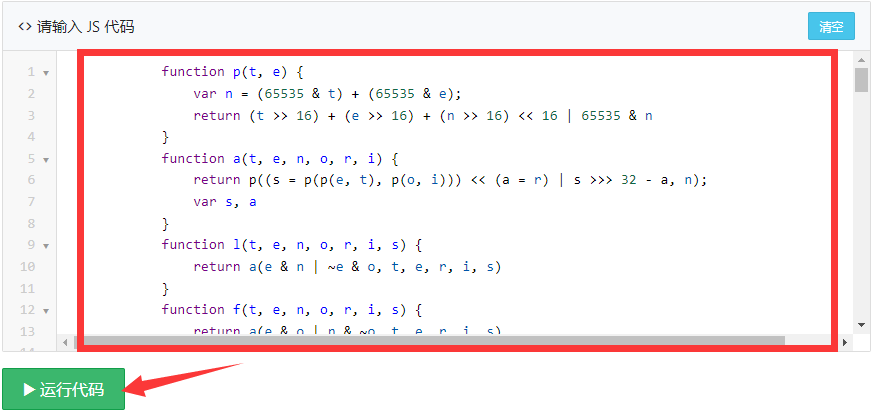
>这里发现报错，提示n没有定义

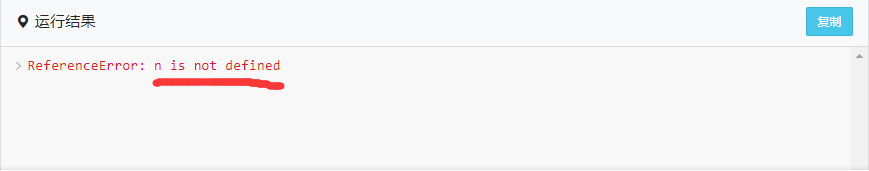

>在语句开头添加定义n为空再让程序运行

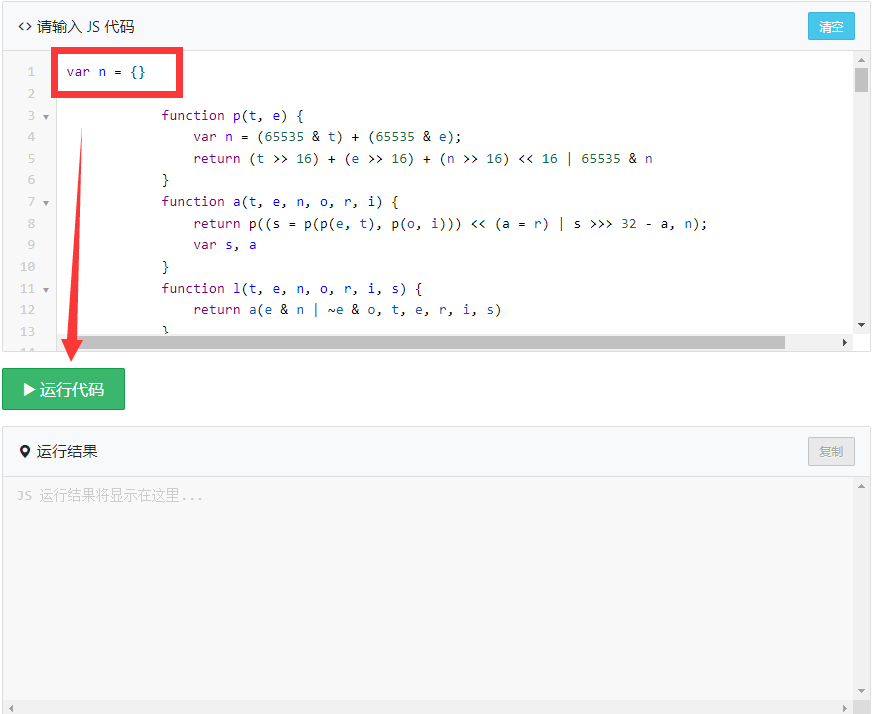

>语法没有问题，改写函数方便调用,将n.exports = function(t, e, n)改为function getPwd(t,e,n)  
>因为整个加密代码是靠这个函数调用，然后赋予给n.exports，我们直接改写为函数，这样方便我们调用这个函数  
>在代码末尾添加输出执行这个函数的结果：console.log(getPwd("123456"));  
>发现加密的结果正好和发送的pwd加密字段一致，证明此段js代码正是登录的加密程序  

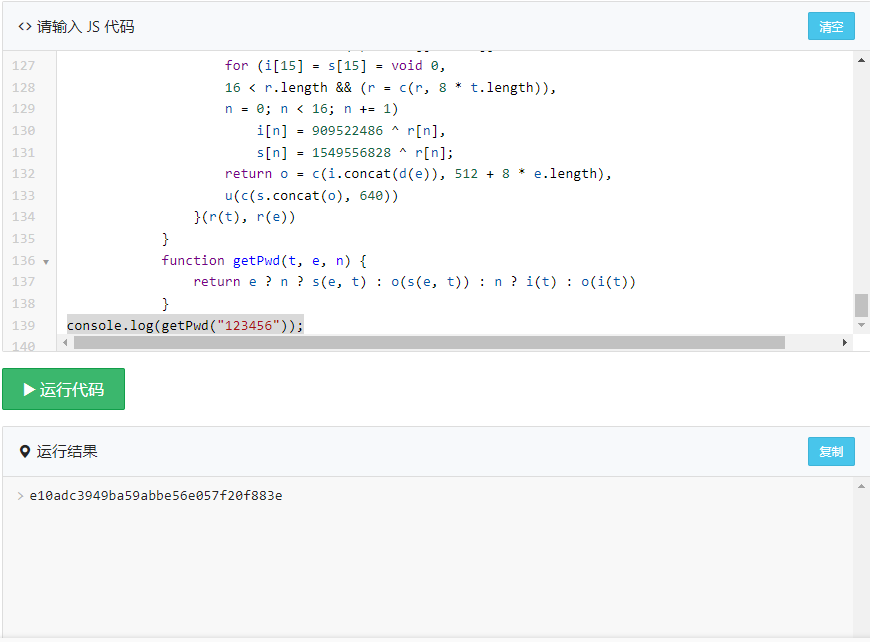
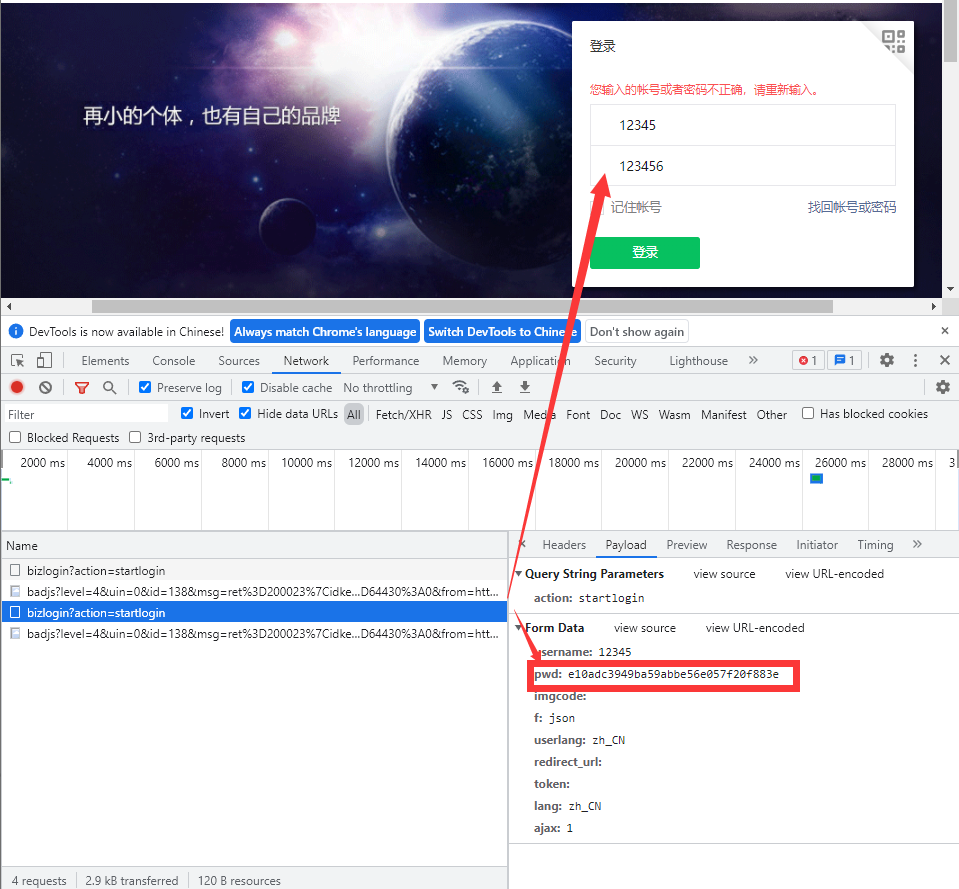

#### 6.实现Python运行JS代码
>可以用逐句翻译JS代码为Python代码  
>这里使用PyExecJs包来运行JS代码  
>使用PyExecJs首先需要配置nodejs环境([简书·Nodejs安装及环境配置](https://www.jianshu.com/p/13f45e24b1de))  
>然后使用pip install PyExecJs安装这个包  
>将js代码复制，新建一个js文件，粘贴后保存，方便之后调用  

In [3]:
"""实验载入js代码"""
#导入包
import execjs

#实例化一个node对象
node = execjs.get()

#js源文件编译
ctx = node.compile(open("./wechat_encryption.js",encoding="utf-8").read())

#执行js函数
text = "123456" # 需要加密的文本
funcName = f'getPwd({text})' # 定义的函数名,传入文本
pwd = ctx.eval(funcName)
print(pwd)

e10adc3949ba59abbe56e057f20f883e


In [7]:
"""请求模拟登录"""
import requests as rq

username = "123456" # 帐号
password = "123456" # 密码
# 将密码加密
funcName = f'getPwd({password})'
pwd = ctx.eval(funcName)

url = "https://mp.weixin.qq.com/cgi-bin/bizlogin?action=startlogin" #访问地址
data = {"username":f"{username}","pwd":f"{pwd}"}
headers = {
    "user-agent":
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36",
    "referer": "https://mp.weixin.qq.com/"
} # 传入身份标识和防盗链
rsp = rq.post(url=url, data=data, headers=headers)

print(rsp.text)

{"base_resp":{"err_msg":"acct/password error","ret":200023}}
